In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("bitcoin_data.csv")

In [5]:
data.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,1/1/17 0:00,966.34,1005.00,960.53,997.75,6850.59,6764742.06,987.47
1,1/2/17 0:00,997.75,1032.00,990.01,1012.54,8167.38,8273576.99,1013.00
2,1/3/17 0:00,1011.44,1039.00,999.99,1035.24,9089.66,9276500.31,1020.56
3,1/4/17 0:00,1035.51,1139.89,1028.56,1114.92,21562.46,23469644.96,1088.45
4,1/5/17 0:00,1114.38,1136.72,885.41,1004.74,36018.86,36211399.53,1005.35


In [6]:
data.shape

(452, 8)

In [7]:
data.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 8 columns):
Timestamp            452 non-null object
Open                 452 non-null float64
High                 452 non-null float64
Low                  452 non-null float64
Close                452 non-null float64
Volume (BTC)         452 non-null float64
Volume (Currency)    452 non-null float64
Weighted Price       452 non-null float64
dtypes: float64(7), object(1)
memory usage: 26.5+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
data["Timestamp"] = LabelEncoder().fit_transform(data["Timestamp"])

In [11]:
X = data.drop("Weighted Price", axis = 1)
y = data["Weighted Price"]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 452 artists>

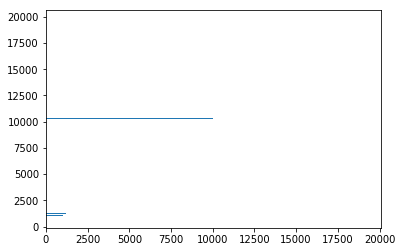

In [13]:
plt.barh(data["High"], data["Weighted Price"])

<BarContainer object of 452 artists>

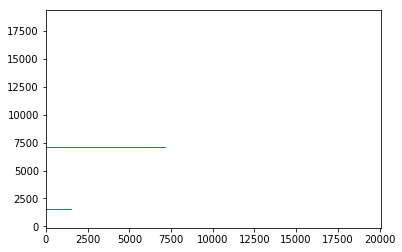

In [14]:
plt.barh(data["Low"], data["Weighted Price"])

<BarContainer object of 452 artists>

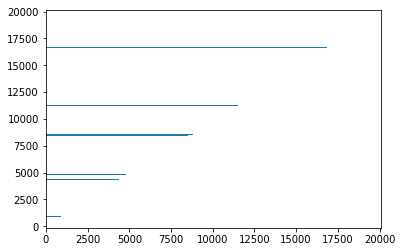

In [15]:
plt.barh(data["Close"], data["Weighted Price"])

<BarContainer object of 452 artists>

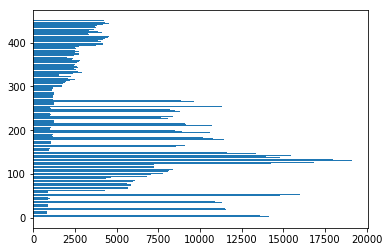

In [16]:
plt.barh(data["Timestamp"], data["Weighted Price"])

In [17]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.3)

In [19]:
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

Test Mean Absolute Residuals (Linear Regression) : 28.3508 
Test Mean Absolute Residuals (Random Forest Regressor) : 63.1820 
Test Mean Absolute Residuals (KNeighbors Regressor) : 200.7799 
Test Mean Absolute Residuals (Ridge Regressor) : 36.5468 
Test Mean Absolute Residuals (Elastic Net Regressor) : 374.4185 
Test Mean Absolute Residuals (Lasso Regressor) : 32.3264 


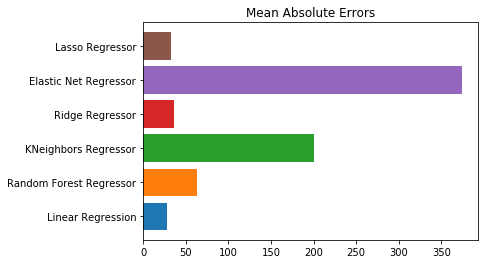

In [20]:
LR = LinearRegression()
RF = RandomForestRegressor()
KNN = KNeighborsRegressor()
RR = Ridge()
EN = ElasticNet()
LS = Lasso()
clfs = []
for clf, label in zip([LR, RF, KNN, RR, EN, LS],
                      ['Linear Regression',
                       'Random Forest Regressor',
                       'KNeighbors Regressor',
                       'Ridge Regressor',
                       'Elastic Net Regressor',
                       'Lasso Regressor']):
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Mean Absolute Residuals (%s) : %0.4f " % (label,sklearn.metrics.mean_absolute_error(clf.predict(X_test), y_test)))
    plt.barh(label,sklearn.metrics.mean_absolute_error(clf.predict(X_test), y_test))
    plt.title("Mean Absolute Errors")